# Italian to English Language Translation (NMT)

**Import All the neccessary Libraries which we will be requiring to run this notebook and the project**

I will be using seq2seq model with the LSTM so all the libraries related to it should be installed and also Keras's tokenizer function which is essential to the tekenize the text

All the basic libraries such as numpy, pandas, string, matplotlib and etc also imported along with other helper libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
#Make plots bigger
plt.rcParams['figure.figsize'] = (16, 9)
import warnings
warnings.filterwarnings('ignore')
import string
import re
import os
import time
from numpy import array, argmax, random, take
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Bidirectional, RepeatVector, TimeDistributed, Activation
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras import optimizers
from __future__ import absolute_import, division, print_function
import matplotlib.pyplot as plt
% matplotlib inline
pd.set_option('display.max_colwidth', 300)
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import corpus_bleu
from sklearn.model_selection import train_test_split
print(tf.__version__)

1.13.1


Creating a function which will read the file, encode it and save it and then the funtion to_lines wil  split the data into Italian & English part seperately by '\n' and build it in the form of sentences

In [4]:
def Read_TextFile(filename):
    file = open(filename, mode='rt', encoding='utf-8')
    text = file.read()
    file.close()
    return text

def to_lines(text):
    sentences = text.strip().split('\n')
    sentences = [i.split('\t') for i in sentences]
    return sentences

By using the function we wrote the text file is imported to the jupyter notebook. 

Once the notebook is opened and read using the function Read_TextFile we will pass it to the to_lines to split and to build the sentences of the same

In [5]:
data = Read_TextFile("ita.txt")

In [6]:
ItalianNEng = to_lines(data)
ItalianNEng

[['Hi.', 'Ciao!'],
 ['Run!', 'Corri!'],
 ['Run!', 'Corra!'],
 ['Run!', 'Correte!'],
 ['Who?', 'Chi?'],
 ['Wow!', 'Wow!'],
 ['Jump!', 'Salta!'],
 ['Jump!', 'Salti!'],
 ['Jump!', 'Saltate!'],
 ['Jump.', 'Salta.'],
 ['Jump.', 'Salti.'],
 ['Jump.', 'Saltate.'],
 ['Stop!', 'Fermati!'],
 ['Stop!', 'Fermatevi!'],
 ['Stop!', 'Stop!'],
 ['Stop!', 'Si fermi!'],
 ['Wait!', 'Aspetta!'],
 ['Wait!', 'Aspettate!'],
 ['Wait!', 'Aspetti!'],
 ['Wait.', 'Aspetta.'],
 ['Wait.', 'Aspetti.'],
 ['Wait.', 'Aspettate.'],
 ['Do it.', 'Fallo.'],
 ['Do it.', 'Falla.'],
 ['Do it.', 'Lo faccia.'],
 ['Do it.', 'La faccia.'],
 ['Do it.', 'Fatelo.'],
 ['Do it.', 'Fatela.'],
 ['Go on.', 'Vai avanti.'],
 ['Go on.', 'Continua.'],
 ['Go on.', 'Continui.'],
 ['Go on.', 'Continuate.'],
 ['Go on.', 'Vada avanti.'],
 ['Go on.', 'Andate avanti.'],
 ['Hello!', 'Buongiorno!'],
 ['Hello!', 'Ciao!'],
 ['Hello!', 'Salve.'],
 ['I ran.', 'Ho corso.'],
 ['I ran.', 'Corsi.'],
 ['I see.', 'Capisco.'],
 ['I see.', 'Io capisco.'],
 ['I tr

The ItalianEng has the data which we just imported and then ran through a funtion is now converted to the array by using the Python's inbuilt function "array"

In [51]:
ItalianNEng = array(ItalianNEng)
ItalianNEng

array([['hi', 'ciao'],
       ['run', 'corri'],
       ['run', 'corra'],
       ...,
       ['three were killed', 'tre sono stati uccisi'],
       ['three were killed', 'tre furono uccisi'],
       ['throw me the ball', 'lanciami la palla']], dtype='<U317')

**As our dataset is too large, we will take first 50000 to train and test the model, If the CPU and GPU permits we can load the whole dataset**


Split the whole dataset to check how model works and it would be better to run the model once for shorter dataset and then to increase the dataset if the CPU and GPU of the system permits

In [8]:
ItalianNEng = ItalianNEng[:50000,:]
ItalianNEng

array([['Hi.', 'Ciao!'],
       ['Run!', 'Corri!'],
       ['Run!', 'Corra!'],
       ...,
       ['Three were killed.', 'Tre sono stati uccisi.'],
       ['Three were killed.', 'Tre furono uccisi.'],
       ['Throw me the ball.', 'Lanciami la palla.']], dtype='<U317')

In [9]:
ItalianNEng.dtype

dtype('<U317')

## PreProcessing the data/ Cleaning the data

**remove all the punctuation and then change the case of every word to lower case**


we will remove the punctuation in the below code by going through each line of the data and storing it in the same variable ItalianEng

In [10]:
ItalianNEng[:,0] = [sent.translate(str.maketrans('', '', string.punctuation)) for sent in ItalianNEng[:,0]]
ItalianNEng[:,1] = [sent.translate(str.maketrans('', '', string.punctuation)) for sent in ItalianNEng[:,1]]

Here all the punctuation is removed/cleaned and the data looks like below

In [11]:
ItalianNEng

array([['Hi', 'Ciao'],
       ['Run', 'Corri'],
       ['Run', 'Corra'],
       ...,
       ['Three were killed', 'Tre sono stati uccisi'],
       ['Three were killed', 'Tre furono uccisi'],
       ['Throw me the ball', 'Lanciami la palla']], dtype='<U317')

Now we will convert the data into lower case by using python's inbuilt function lower() and save the data to its original variable ItalianEng

In [12]:
for i in range(len(ItalianNEng)):
    ItalianNEng[i,0] = ItalianNEng[i,0].lower()
    
    ItalianNEng[i,1] = ItalianNEng[i,1].lower()

In [14]:
ItalianNEng

array([['hi', 'ciao'],
       ['run', 'corri'],
       ['run', 'corra'],
       ...,
       ['three were killed', 'tre sono stati uccisi'],
       ['three were killed', 'tre furono uccisi'],
       ['throw me the ball', 'lanciami la palla']], dtype='<U317')

**Split the Italian sentence and English sentence and check the length of the words in an sentence and store in the list**

To run the seq2Seq model on the data, we need to have both input and output of the same length, so to do that we will create two empty arrays where the length of the input and output is stored for the padding and tokenizing the data

In [15]:
eng_length = []
ita_length = []

# populate the lists with sentence lengths
for i in ItalianNEng[:,0]:
    eng_length.append(len(i.split()))

for i in ItalianNEng[:,1]:
    ita_length.append(len(i.split()))

In [16]:
eng_length

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,


In [17]:
ita_length

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 4,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 3,
 3,
 1,
 2,
 3,
 4,
 3,
 4,
 2,
 3,
 2,
 3,
 2,
 3,
 1,
 2,
 4,
 5,
 4,
 5,
 3,
 4,
 2,
 3,
 1,
 2,
 2,
 3,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 3,
 3,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 3,
 1,
 2,
 1,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 3,
 2,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 2,
 1,
 3,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,


The below graph shows the distribution of the length of the data, which will help us to decide on how much length we will be passing to the model and which data will be padded.

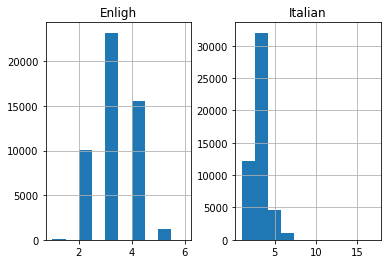

In [18]:
length_dframe = pd.DataFrame({'Enligh':eng_length, 'Italian':ita_length})
length_dframe.hist(bins = 10)
plt.show()

**We will create a function which will tokenize our data with the help of the Keras's tokenization function which we have imported at the beginning of this notebook**

Below is the function which will help us to vectorize the data by using Keras's tokenization function. Basically Tokenization will convert the text into sentences which will be well read by the model and it will be easier to train the model

In [19]:
def tokenization(sentences):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    return tokenizer

Here we will tokenize the english word using the funtion we wrote above and then we will check the total English Vocabulary size after tokenizing --> here we are adding the additional one to the size as the tokenizer initiates from zero

and the length of the English data is set to 5 because as per the above graph we see that maximum length of English data is 5 and 6 is the maximum length of Italian data, so to make it equal we will take length as **5**

In [20]:
# prepare english tokenizer
English_tokenizer = tokenization(ItalianNEng[:, 0])
English_Vocab_Size = len(English_tokenizer.word_index) + 1

Eng_length = 5
print('English Vocabulary Size in the dataset is: %d' % English_Vocab_Size)

English Vocabulary Size in the dataset is: 4214


Here we will tokenize the Italian word using the funtion we wrote above and then we will check the total Italian Vocabulary size after tokenizing --> here we are adding the additional one to the size as the tokenizer initiates from zero

and the length of the Italian data is set to 5 because as per the above graph we see that maximum length of English data is 5 and 6 is the maximum length of Italian data, so to make it equal we will take length as **5**

In [21]:
Italian_tokenizer = tokenization(ItalianNEng[:, 1])
Italian_Vocab_Size = len(Italian_tokenizer.word_index) + 1

Ita_length = 5
print('Italian Vocabulary Size in the dataset is: %d' % Italian_Vocab_Size)

Italian Vocabulary Size in the dataset is: 9614


**The values must be encoded from text to sequences of number and padded the sequence using Keras's function**

The below function will help to build the sequences and also perform sequence padding to the data if the data length of the sentence is less than the maximum length defined which is **5**

In [22]:
def encode_sequences(tokenizer, length, lines):
    sequences = tokenizer.texts_to_sequences(lines)
    sequences = pad_sequences(sequences, maxlen=length, padding='post')
    return sequences

**split the data into training data and test data by using Sklearn.Model_selection's train_test_split function**


Split the whole data which we saved in the variable ItalianNEng as 80% to train and 20% to the test. Once the data is split we will run it through the encode sequence which will create sequences of the text and then performs padding sequences on the data whose length is less than the defined maximum length

In [23]:
train, test = train_test_split(ItalianNEng, test_size=0.2, random_state = 10)

In [24]:
print(train.shape)

(40000, 2)


In [25]:
print(test.shape)

(10000, 2)


In [26]:
x_train = encode_sequences(Italian_tokenizer, Ita_length, train[:, 1])
y_train = encode_sequences(English_tokenizer, Eng_length, train[:, 0])

So every sentence is converted into 5 digit sequence which we will be feeding it to the model and if you see there are 0s added to the array where the length of the data is less than that of the maximum defined length

In [27]:
x_train

array([[   2,   32,   14,    0,    0],
       [   1,   24,    2, 2237,    0],
       [   2,   10,  864,    0,    0],
       ...,
       [   1,    2,  896,    0,    0],
       [   1,    2, 2192,    0,    0],
       [  67,  207,    0,    0,    0]])

In [28]:
y_train

array([[  49,   99,    3,    0,    0],
       [   2,  399,  453,    0,    0],
       [  17,    3,   37,    7, 1021],
       ...,
       [   2,    5,  850,    0,    0],
       [   2,   80, 2506,    0,    0],
       [ 624,    6,  138,    0,    0]])

In [29]:
x_test = encode_sequences(Italian_tokenizer, Ita_length, test[:, 1])
y_test = encode_sequences(English_tokenizer, Eng_length, test[:, 0])

In [30]:
x_test

array([[  41,   17,   85,  120,    0],
       [   4,  283,  204,    0,    0],
       [  45,  840,    0,    0,    0],
       ...,
       [ 489,    6,  943,    0,    0],
       [   1,    2, 9091,    0,    0],
       [ 404,   19,   50,    0,    0]])

In [31]:
y_test

array([[  26,    8,  159,    0,    0],
       [   4,  351,  105,    0,    0],
       [   1,  329,    3,    0,    0],
       ...,
       [ 102, 1042,    0,    0,    0],
       [   2,    5, 2137,    0,    0],
       [   1,   68,   42,    6,    0]])

## LSTM Model

**Build the Seq2Seq LSTM model**

Build the model which will take the encoded training dataset and once trained will predict the data which will be in the array format can be decoded back to text format by running it throught the function

So the model architecture will be sequential which has encoder and decoder in it, Model would be sequential, embedding with LSTM layer and at the end it will be LSTM followed by the Dense layer which will act as a decoder for thr project

In [32]:
def build_model(ItalianVocabSize, EnglishVocabSize, ItalianLength, EnglishLength, Units):
    model = Sequential()
    model.add(Embedding(ItalianVocabSize, Units, input_length=ItalianLength, mask_zero=True))
    model.add(LSTM(Units))
    model.add(RepeatVector(EnglishLength))
    model.add(LSTM(Units, return_sequences=True))
    model.add(Dense(EnglishVocabSize, activation='softmax'))
    model.summary()
    return model

Build the model by passing the parameters and save the model and below is the summary of the model

In [33]:
model = build_model(Italian_Vocab_Size, English_Vocab_Size, Ita_length, Eng_length, 512 )

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5, 512)            4922368   
_________________________________________________________________
lstm_1 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 5, 512)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 512)            2099200   
_________________________________________________________________
dense_1 (Dense)              (None, 5, 4214)           2161782   
Total params: 11,282,550
Trainable params: 11,282,550
Non-trainable params: 0
_________________________________________________________________


We are using RMSProp as the optimizer for the model and sparse_categorical_crossentropy as the loss function.

we can play around with these to see which is better suitable for our model, but to train the model we will be going with the above mentoned optimizer and the loss function

In [34]:
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

## Training the model

we will train the model by passing the training data which we split and passed it through the funtion. we will be saving out model on each iteration of the epochs 

We will be running this model with **35 Epochs**, **512 batch size**

we will play around with the batch size and number of epochs to see the best combination

In [35]:
filename = 'SavedModel_Checkpoint'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

history = model.fit(x_train, y_train.reshape(y_train.shape[0], y_train.shape[1], 1), 
          epochs=35, batch_size=512,
          validation_split = 0.2,
          callbacks=[checkpoint], verbose=1)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 32000 samples, validate on 8000 samples
Epoch 1/35
32000/32000 [==============================] - 15s 464us/step - loss: 4.3675 - val_loss: 3.7549

Epoch 00001: val_loss improved from inf to 3.75490, saving model to SavedModel_Checkpoint
Epoch 2/35
32000/32000 [==============================] - 10s 318us/step - loss: 3.6031 - val_loss: 3.5102

Epoch 00002: val_loss improved from 3.75490 to 3.51022, saving model to SavedModel_Checkpoint
Epoch 3/35
32000/32000 [==============================] - 10s 318us/step - loss: 3.3427 - val_loss: 3.2865

Epoch 00003: val_loss improved from 3.51022 to 3.28653, saving model to SavedModel_Checkpoint
Epoch 4/35
32000/32000 [==============================] - 10s 321us/step - loss: 3.1106 - val_loss: 3.0869

Epoch 00004: val_loss improved from 3.28653 to 3.08687, saving model to SavedModel_Checkpoint
Epoch 5/35
32000/3200

**plotting the graph** Once the model is built and we also capturing the model loss and the validation loss, we can go ahead and see how the loss is affected by the each iteration
to see that we will plot the graph which will show us the pattern

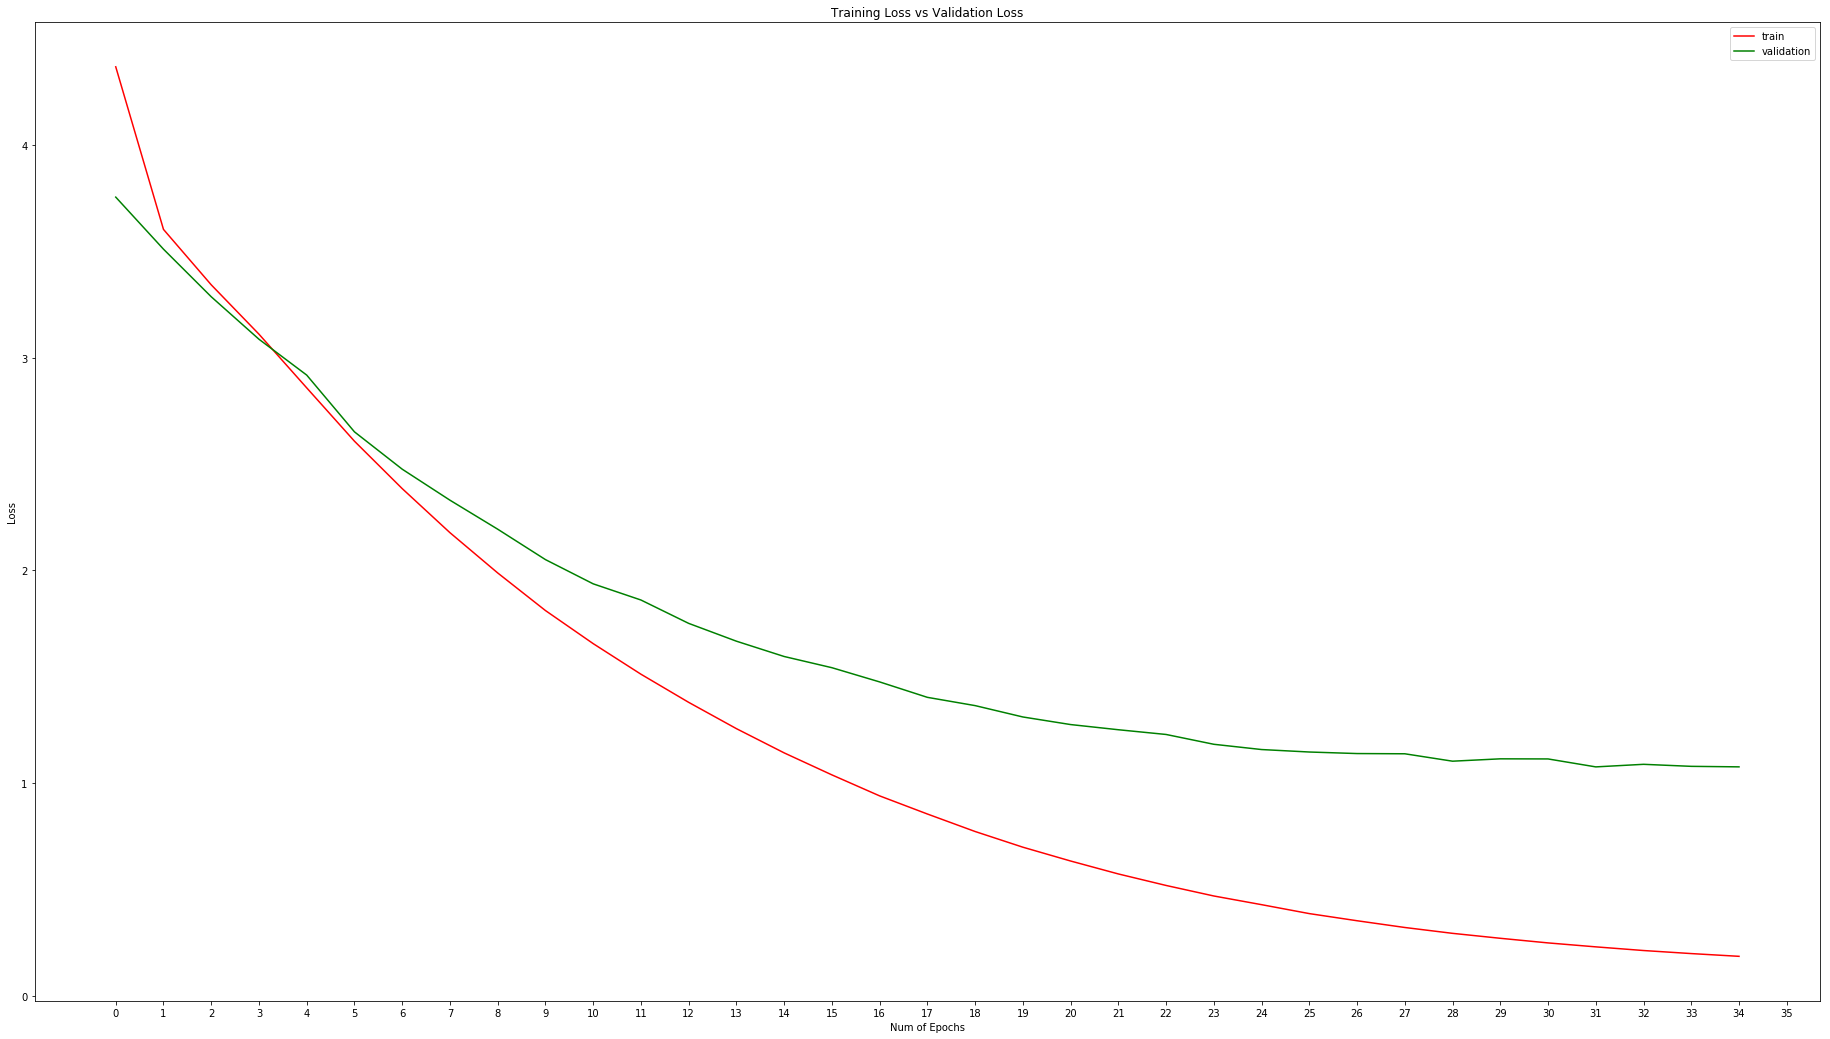

In [37]:
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 36, 1))
plt.rcParams['figure.figsize'] = (32, 18)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

By looking at the graph we can say that the validation loss stopped dropping after **25 epochs** or the loss dropping very slowly after 25 epochs

**Predicting the output**

As the model is now built, we will pass the testing data and see how the built model predicts.

and as the predicted data will be in the form of array we need to convert the sequence back to word which can be done by the function "get_word"

In [38]:
preds = history.model.predict_classes(x_test.reshape((x_test.shape[0],x_test.shape[1])))

In [39]:
preds[0]

array([ 26,   8, 159,   0,   0], dtype=int64)

The below function will return the text when we pass the tokenized array and as we will store the predicted text into our empty array "predicted_text" where we will append all the results 

In [40]:
def get_word(n, tokenizer):
      for word, index in tokenizer.word_index.items():
          if index == n:
              return word
      return None

In [41]:
predicted_text = []
for i in preds:
       temp = []
       for j in range(len(i)):
            t = get_word(i[j], English_tokenizer)
            if j > 0:
                if (t == get_word(i[j-1], English_tokenizer)) or (t == None):
                     temp.append('')
                else:
                     temp.append(t)
            else:
                   if(t == None):
                          temp.append('')
                   else:
                          temp.append(t) 

       predicted_text.append(' '.join(temp))

Prediction is done, predicted output is converted back to text format and now we will check how the predicted format looks like, we will pass it through the pandas dataframe  and see the Italian data with Actual data and the predicted data side by side

In [42]:
pred_dframe = pd.DataFrame({'Italian' : test[:,1] ,'actual' : test[:,0], 'predicted' : predicted_text})
#pred_df = pd.DataFrame({'Italian' : test[:,1] ,'actual' : test[:,0], 'predicted' : preds_text})

We will see how the translation is done, so to check we will check the first 50 texts

In [43]:
pred_dframe.head(50)

,Italian,actual,predicted
0,ora sei al sicuro,now youre safe,now youre safe
1,sono sempre pronta,im always ready,im always ready
2,ti amavo,i loved you,i loved you
3,tom lha visto,tom saw it,did tom see you
4,lui non ha detto niente,he said nothing,he said nothing
5,qualcuno lha visto,somebody saw you,somebody saw see
6,tom sta parlando,tom is talking,tom is speaking
7,state a guardare,stay and watch,stay and watch
8,spegnetelo,switch it off,turn that off
9,sono sistematico,im methodical,im resourceful


## Evaluation

Bilingual Evaluation Understudy Score (BLEU). The Bilingual Evaluation Understudy Score, or BLEU for short, is a metric for evaluating a generated sentence to a reference sentence. A perfect match results in a score of 1.0, whereas a perfect mismatch results in a score of 0.0.

we will build the function which will makes a list of the actual output with the predicted output and then evaluates using the corpus_bleu which is a function of the nltk library "nltk.translate.bleu_score"

In [50]:
def predict_sequence(model, tokenizer, source):
    prediction = model.predict(source, verbose=0)[0]
    integers = [argmax(vector) for vector in prediction]
    target = list()
    for i in integers:
        word = get_word(i, tokenizer)
        if word is None:
            break
        target.append(word)
    return ' '.join(target)

In [48]:
def evaluate_model(model, tokenizer, sources, raw_dataset):
    actual, predicted = list(), list()
    for i, source in enumerate(sources):
        # translate encoded source text
        source = source.reshape((1, source.shape[0]))
        translation = predict_sequence(model, English_tokenizer, source)
        raw_target, raw_src = raw_dataset[i]
        if i < 10:
            print('src=[%s], target=[%s], predicted=[%s]' % (raw_src, raw_target, translation))
        actual.append(raw_target.split())
        predicted.append(translation.split())
    # calculate BLEU score
    print('BLEU: %f' % corpus_bleu(actual, predicted, weights=(1, 0, 0, 0)))
    #print('BLEU: %f' % sentence_bleu(actual, predicted))
    

In [49]:
evaluate_model(model, English_tokenizer, x_train[:50,:], train[:50,:])

src=[è per lei], target=[thats for you], predicted=[thats for you]
src=[tom si è addormentato], target=[tom fell asleep], predicted=[tom fell asleep]
src=[è di fretta], target=[are you in a rush], predicted=[are you in a rush]
src=[loro sono miei], target=[theyre mine], predicted=[theyre mine]
src=[loro lo amano], target=[they love that], predicted=[they love that]
src=[noi vogliamo degli impieghi], target=[we want jobs], predicted=[we want jobs]
src=[siete energiche], target=[are you proactive], predicted=[youre energetic]
src=[tom lavora qui], target=[tom works here], predicted=[tom works here]
src=[mi dia una scelta], target=[give me a choice], predicted=[give me a choice]
src=[tom fiutò], target=[tom sniffed], predicted=[tom sniffed]
BLEU: 0.114642


The evalution of the prediction gives us the corpus score of the 0.11 which can be increased by playing aroud with the data size, batch size, optimizers, loss, and epochs

## HyperParameters

## References



**o** https://medium.com/@ageitgey/machine-learning-is-fun-part-5-language-translation-with-deep-learning-and-the-magic-of-sequences-2ace0acca0aa

**o** https://www.analyticsvidhya.com/blog/2018/03/microsofts-claims-language-translation-ai-reached-human-levels-accuracy/

**o** https://blog.statsbot.co/machine-learning-translation-96f0ed8f19e4

**o** https://www.youtube.com/watch?v=nRBnh4qbPHI&vl=en

**o** http://www.manythings.org/anki/

**o** https://machinelearningmastery.com/introduction-neural-machine-translation/

**o** https://machinelearningmastery.com/develop-neural-machine-translation-system-keras/

**o** https://www.youtube.com/watch?v=vI2Y3I-JI2Q

**o** https://towardsdatascience.com/neural-machine-translator-with-less-than-50-lines-of-code-guide-1fe4fdfe6292

**o** https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/r2/tutorials/text/

**o** https://machinelearningmastery.com/tune-lstm-hyperparameters-keras-time-series-forecasting/



## License

**MIT License**

Copyright 2018 Chetan M Jadhav

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

**The text in the document by Chetan M Jadhav is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/ **